In [5]:
from __future__ import print_function, division

In [6]:
import numpy as np 

In [7]:
def conv1d(a, w, b = 0, stride = 1, pad = 0):
    """
    compute 1d convolutional (with bias)
    """
    w_old = a.shape[0]
    f = w.shape[0]
    a_pad = np.pad(a, pad_width=pad, mode = 'constant', constant_values = 0)
    w_new = int((w_old - f + 2*pad)/stride) + 1 
    a_res = np.zeros((w_new))
    for i in range(w_new):
        start = i*stride
        end = start + f
        a_res[i] = np.sum(a_pad[start:end]*w) + b 
    return a_res

In [8]:

N = 200
x_clean = np.sin(np.arange(N)/20.)
x_noisy = x_clean + .05*np.random.randn(N)
w = 1./3*np.ones(3)
x_filtered = conv1d(x_noisy, w) 

from matplotlib import pyplot as plt 
fig = plt.figure(figsize = (15, 2))
plt.subplot(131)
plt.plot(x_clean, 'b')
plt.xlabel('(a) clean signal', fontsize=14 )
# plt.axis('off')

plt.subplot(132)
plt.plot(x_noisy, 'b')
plt.xlabel('(b) noisy signal', fontsize=14 )
# plt.axis('off')
plt.subplot(133)
plt.plot(x_filtered, 'b')
plt.xlabel('(c) denoised signal', fontsize=14 )
fig.savefig('conv1d.png', bbox_inches='tight', dpi=600)
plt.show() 
# plt.axis('off')

<Figure size 1500x200 with 3 Axes>

In [9]:
def conv2d_11(A, W, b = 0, stride = 1, pad = 0):
    """
    A: input, A.shape = (n_H_old, n_W_old)
    W: filter, W.shape = (f, f)
    """
    n_H_old, n_W_old = A.shape
    f, f = W.shape
    A_pad = np.pad(A, pad_width=pad, mode = 'constant', constant_values = 0)
    # new shape 
    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1 
    n_W_new = int((n_W_old - f + 2*pad)/stride) + 1 
    # result
    A_res = np.zeros((n_H_new, n_W_new))
    # compute 
    for h in range(n_H_new):
        for v in range(n_W_new):
            h_start = h*stride 
            h_end = h_start + f
            v_start = v*stride 
            v_end = v_start + f
            A_res[h, v] = np.sum(A_pad[h_start:h_end, v_start:v_end] * W) + b 
    return A_res

In [10]:
import skimage


In [24]:
import skimage.io
from skimage.filters import try_all_threshold

472


<function matplotlib.pyplot.show(*args, **kw)>

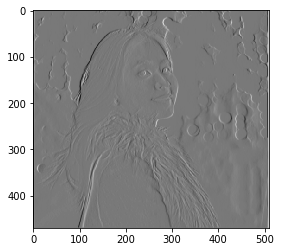

In [31]:
fn = 'mylady3'
img_rgb = skimage.io.imread(fn + '.png')
img_gray = (skimage.color.rgb2gray(img_rgb)*255).astype(np.int)
print(img_gray.shape[0])
W = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_r=conv2d_11(img_gray,W)
plt.imshow(img_r,'gray')
plt.show

In [12]:

f = np.array([[-1, 0, 1], 
              [-1, 0, 1], 
              [-1, 0, 1]])
img_ver_edge = conv2d_11(img_gray, f)
# myshow(np.abs(conv2d(img_gray, f)))

In [13]:

f = np.array([[-1, -1, -1], 
              [0, 0, 0], 
              [1, 1, 1]])
# myshow(np.abs(conv2d(img_gray, f)))
img_hor_edge = conv2d_11(img_gray, f)

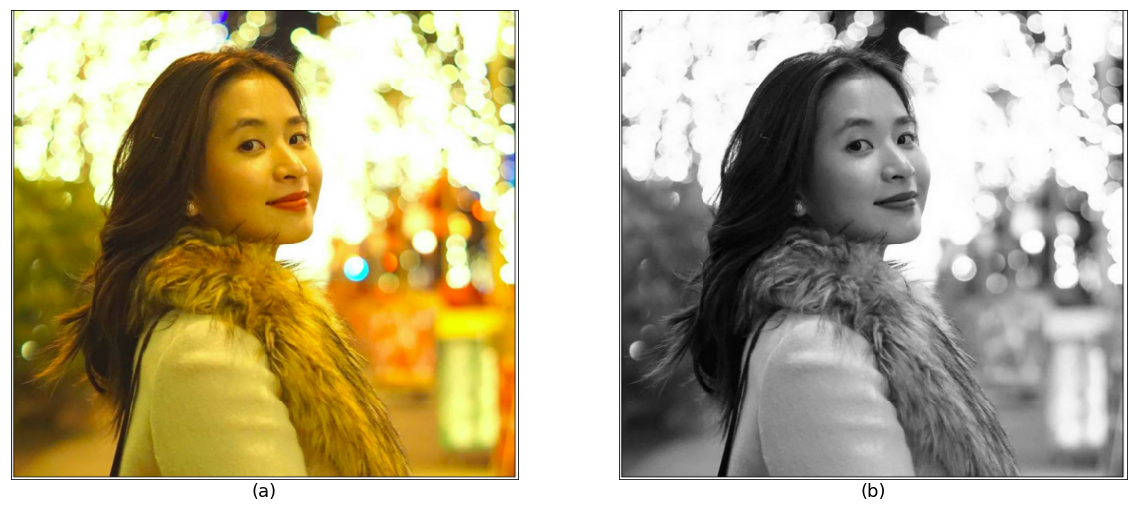

In [14]:
fig = plt.figure(figsize = (20, 10))
plt.subplot(121)
plt.imshow(img_rgb, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(a)', fontsize = 18)

plt.subplot(122)
plt.imshow(img_gray, 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('(b)', fontsize = 18)


plt.show()

fig.savefig(fn + '_rgbgray.png', bbox_inches='tight', dpi = 600)

In [21]:
from skimage.filters import threshold_mean

In [22]:
from skimage import data
from skimage.filters import try_all_threshold